<a href="https://colab.research.google.com/github/mofanchang/AHEAD-interview-question/blob/main/Flow-cytomery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
pip install FlowCytometryTools

In [48]:
pip install flowio

In [49]:
pip install FlowCal

In [50]:
pip install fcsparser

In [70]:
import os
import FlowCal
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


def concat_FCSdata_FeatureName(filename):
    # Load the FCS file
    fcs_file = FlowCal.io.FCSData(filename)

    # View and store feature
    tuple_feature = fcs_file.channels
    list_feature = list(tuple_feature)

    # Convert the FCS data to DataFrame
    df = pd.DataFrame(fcs_file)
    df.columns = list_feature

    return df

# Read label information from Excel file
EU_label = pd.read_excel('/content/drive/MyDrive/EU_label.xlsx')
label = EU_label['label']
label_map = {
    'Sick': 1,
    'Healthy': 0,
}

# Specify the main directory containing subdirectories with FCS files
main_directory = "/content/drive/MyDrive/raw_fcs"

# Initialize an empty DataFrame to store concatenated data
final_df = pd.DataFrame()

# Recursively traverse through the main directory
for root, dirs, files in os.walk(main_directory):
    for file in files:
        if file.endswith(".fcs"):
            file_path = os.path.join(root, file)

            # Extract Patient ID from the filename
            Patient = os.path.basename(os.path.dirname(file_path))
            PatientID = StringIO(Patient)
            df_PatientID = pd.read_csv(PatientID)

            # Concatenate feature names and FCS data
            df = concat_FCSdata_FeatureName(file_path)

            # Find matching label for the current patient
            for index, row in EU_label.iterrows():
                if row['file_flow_id'] == Patient:
                    label_value = row['label']
                    label_int = label_map[label_value]
                    df['Patient_ID'] = Patient
                    df['COVID19'] = label_value
                    df['Label'] = label_int

                    # Concatenate the current patient data to the final DataFrame
                    final_df = pd.concat([final_df, df], ignore_index=True)

# Display the final DataFrame
print(' < Below: The final DataFrame > ')
display(final_df)

# # 大資料夾路徑
# base_folder = "/content/drive/MyDrive/raw_fcs"

# # 遍歷大資料夾中的所有小資料夾
# for folder_name in os.listdir(base_folder):
#     folder_path = os.path.join(base_folder, folder_name)

#     if os.path.isdir(folder_path):
#         print(f"處理小資料夾：{folder_name}")
#         # 在这里可以继续编写处理子文件夹数据的代码
#         x = final_df.drop(['Label','COVID19','Patient_ID'], axis=1)
#         y = final_df['Label'].to_frame()
#         X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#         clf = DecisionTreeClassifier()
#         clf.fit(X_train, y_train)

#         y_pred = clf.predict(X_test)

#         accuracy = accuracy_score(y_test, y_pred)
#         print("Accuracy:", accuracy)

KeyboardInterrupt: ignored

In [71]:
import os
import FlowCal
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def concat_FCSdata_FeatureName(filename):
    # Load the FCS file
    fcs_file = FlowCal.io.FCSData(filename)

    # View and store feature
    tuple_feature = fcs_file.channels
    list_feature = list(tuple_feature)

    # Convert the FCS data to DataFrame
    df = pd.DataFrame(fcs_file)
    df.columns = list_feature

    return df

# Read label information from Excel file
EU_label = pd.read_excel('/content/drive/MyDrive/EU_label.xlsx')
label = EU_label['label']
label_map = {
    'Sick': 1,
    'Healthy': 0,
}

# Specify the main directory containing subdirectories with FCS files
main_directory = "/content/drive/MyDrive/raw_fcs"

# Initialize an empty DataFrame to store concatenated data
final_df = pd.DataFrame()

# Initialize lists to store processed and unprocessed file paths
processed_files = []
unprocessed_files = []

# Recursively traverse through the main directory
for root, dirs, files in os.walk(main_directory):
    for file in files:
        if file.endswith(".fcs"):
            file_path = os.path.join(root, file)
            processed_files.append(file_path)  # Add to processed files list

            # Extract Patient ID from the filename
            Patient = os.path.basename(os.path.dirname(file_path))
            PatientID = StringIO(Patient)
            df_PatientID = pd.read_csv(PatientID)

            # Concatenate feature names and FCS data
            df = concat_FCSdata_FeatureName(file_path)

            # Find matching label for the current patient
            for index, row in EU_label.iterrows():
                if row['file_flow_id'] == Patient:
                    label_value = row['label']
                    label_int = label_map[label_value]
                    df['Patient_ID'] = Patient
                    df['COVID19'] = label_value
                    df['Label'] = label_int

                    # Concatenate the current patient data to the final DataFrame
                    final_df = pd.concat([final_df, df], ignore_index=True)

# Find unprocessed files by subtracting processed files from all files
all_files = []
for root, dirs, files in os.walk(main_directory):
    for file in files:
        if file.endswith(".fcs"):
            file_path = os.path.join(root, file)
            all_files.append(file_path)

unprocessed_files = list(set(all_files) - set(processed_files))

# Print unprocessed file paths
print("Unprocessed files:")
for file_path in unprocessed_files:
    print(file_path)

# Display the final DataFrame
print(' < Below: The final DataFrame > ')
display(final_df)


Unprocessed files:
 < Below: The final DataFrame > 


,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,FJComp-APC-A,FJComp-APC-H7-A,FJComp-APC-R700-A,FJComp-BB630-A,...,FJComp-BYG584-A,FJComp-BYG670-A,FJComp-BYG790-A,FJComp-FITC-A,FJComp-PE-CF594-A,FJComp-PE-Cy5.5-A,Time,Patient_ID,COVID19,Label
0,85016.500000,72034.179688,141938.000000,36644.562500,34746.667969,108497.812500,112.060295,73.952873,575.514587,50.510109,...,367.581573,204.302658,31.506687,-10.046371,96.860161,-10.614620,2.082766,flowrepo_covid_EU_038_flow_001,Sick,1
1,99848.312500,82380.554688,148984.828125,36342.511719,34517.816406,110496.539062,12.135560,-2.252536,1103.213257,-9.319699,...,389.542206,53.993160,36.968693,8196.370117,145.267517,-2.372972,2.098672,flowrepo_covid_EU_038_flow_001,Sick,1
2,87271.375000,70381.554688,149391.328125,102471.359375,95452.343750,124364.382812,-175.771729,34.822311,1798.449951,10.881639,...,622.587097,7.714994,72.636543,108.994469,597.781006,-97.149773,2.110145,flowrepo_covid_EU_038_flow_001,Sick,1
3,99559.828125,81619.625000,152953.578125,33188.042969,30318.783203,110333.085938,-12.676451,-62.132755,711.477234,13.103123,...,112.845123,249.754883,27.184982,299.286194,-0.004420,14.104618,2.126928,flowrepo_covid_EU_038_flow_001,Sick,1
4,91380.500000,74045.578125,152607.359375,43466.996094,42688.882812,110727.539062,25.795591,-65.608521,868.179382,20.005610,...,93.305313,58.850441,257.658386,159.822357,23.634172,-7.000971,2.135461,flowrepo_covid_EU_038_flow_001,Sick,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052715,112839.765625,98341.132812,142445.859375,29081.863281,27505.736328,105076.835938,6.316328,51.644669,942.212097,32.781143,...,445.735321,20.294441,-12.380395,77.997650,230.865921,147.672729,18717.740234,flowrepo_covid_EU_009_flow_001,Healthy,0
5052716,89548.960938,74433.585938,142836.250000,28729.320312,26998.513672,107352.179688,-47.678730,13.358541,964.234131,74.517166,...,363.565735,42.650570,29.225389,41.909229,-48.261032,96.216087,18718.947266,flowrepo_covid_EU_009_flow_001,Healthy,0
5052717,85100.273438,69878.351562,149342.781250,32437.927734,31116.955078,105052.789062,18.279118,42.405369,701.323181,98.870407,...,217.989502,120.296196,215.177963,206.483566,103.814499,162.783371,18719.769531,flowrepo_covid_EU_009_flow_001,Healthy,0
5052718,87624.460938,72880.015625,145184.968750,48090.003906,46063.785156,111395.398438,78.057076,17.310251,1029.988525,92.421181,...,375.092560,177.576324,407.668121,370.730530,77.303802,-7.522663,18720.822266,flowrepo_covid_EU_009_flow_001,Healthy,0


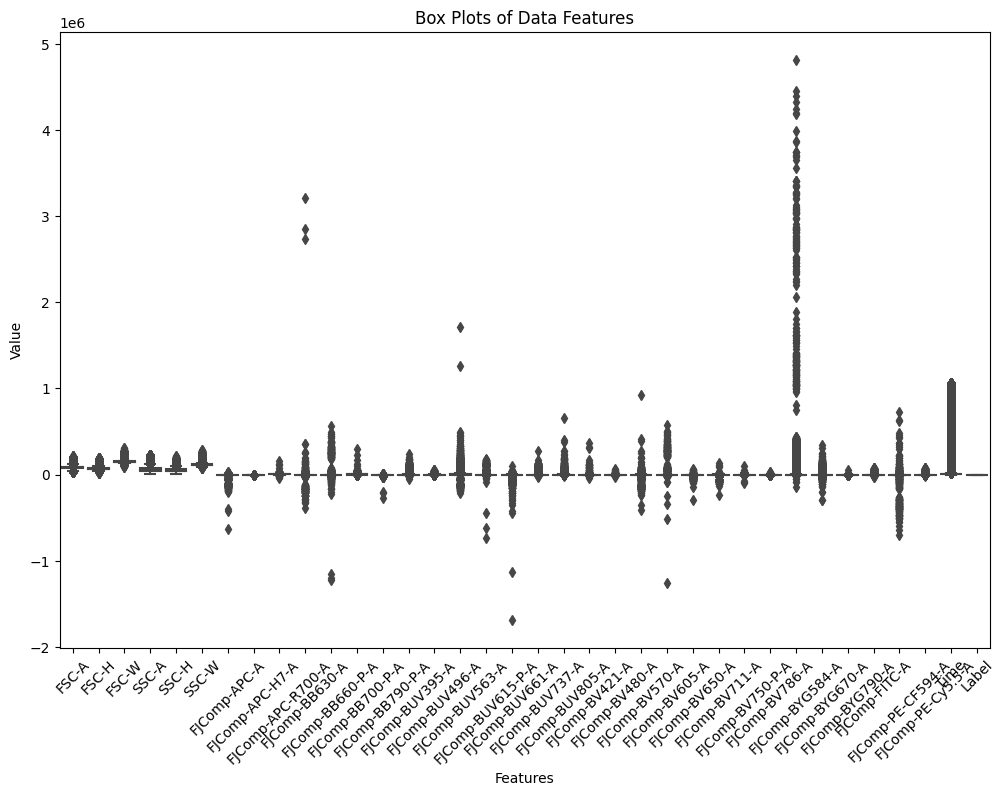

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a pandas DataFrame (assuming you have already loaded your data)
df =final_df

# # Plot histograms for each feature
# def plot_histograms(data):
#     plt.figure(figsize=(12, 8))
#     for column in data.columns:
#         plt.hist(data[column], bins=20, alpha=0.5, label=column)
#     plt.xlabel("Value")
#     plt.ylabel("Frequency")
#     plt.title("Histograms of Data Features")
#     plt.legend()
#     plt.show()

# Plot box plots for each feature
def plot_boxplots(data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data)
    plt.xlabel("Features")
    plt.ylabel("Value")
    plt.title("Box Plots of Data Features")
    plt.xticks(rotation=45)
    plt.show()

# Explore data distribution using histograms and box plots
# plot_histograms(df)
plot_boxplots(df)


In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-54-4803c2c269e2>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


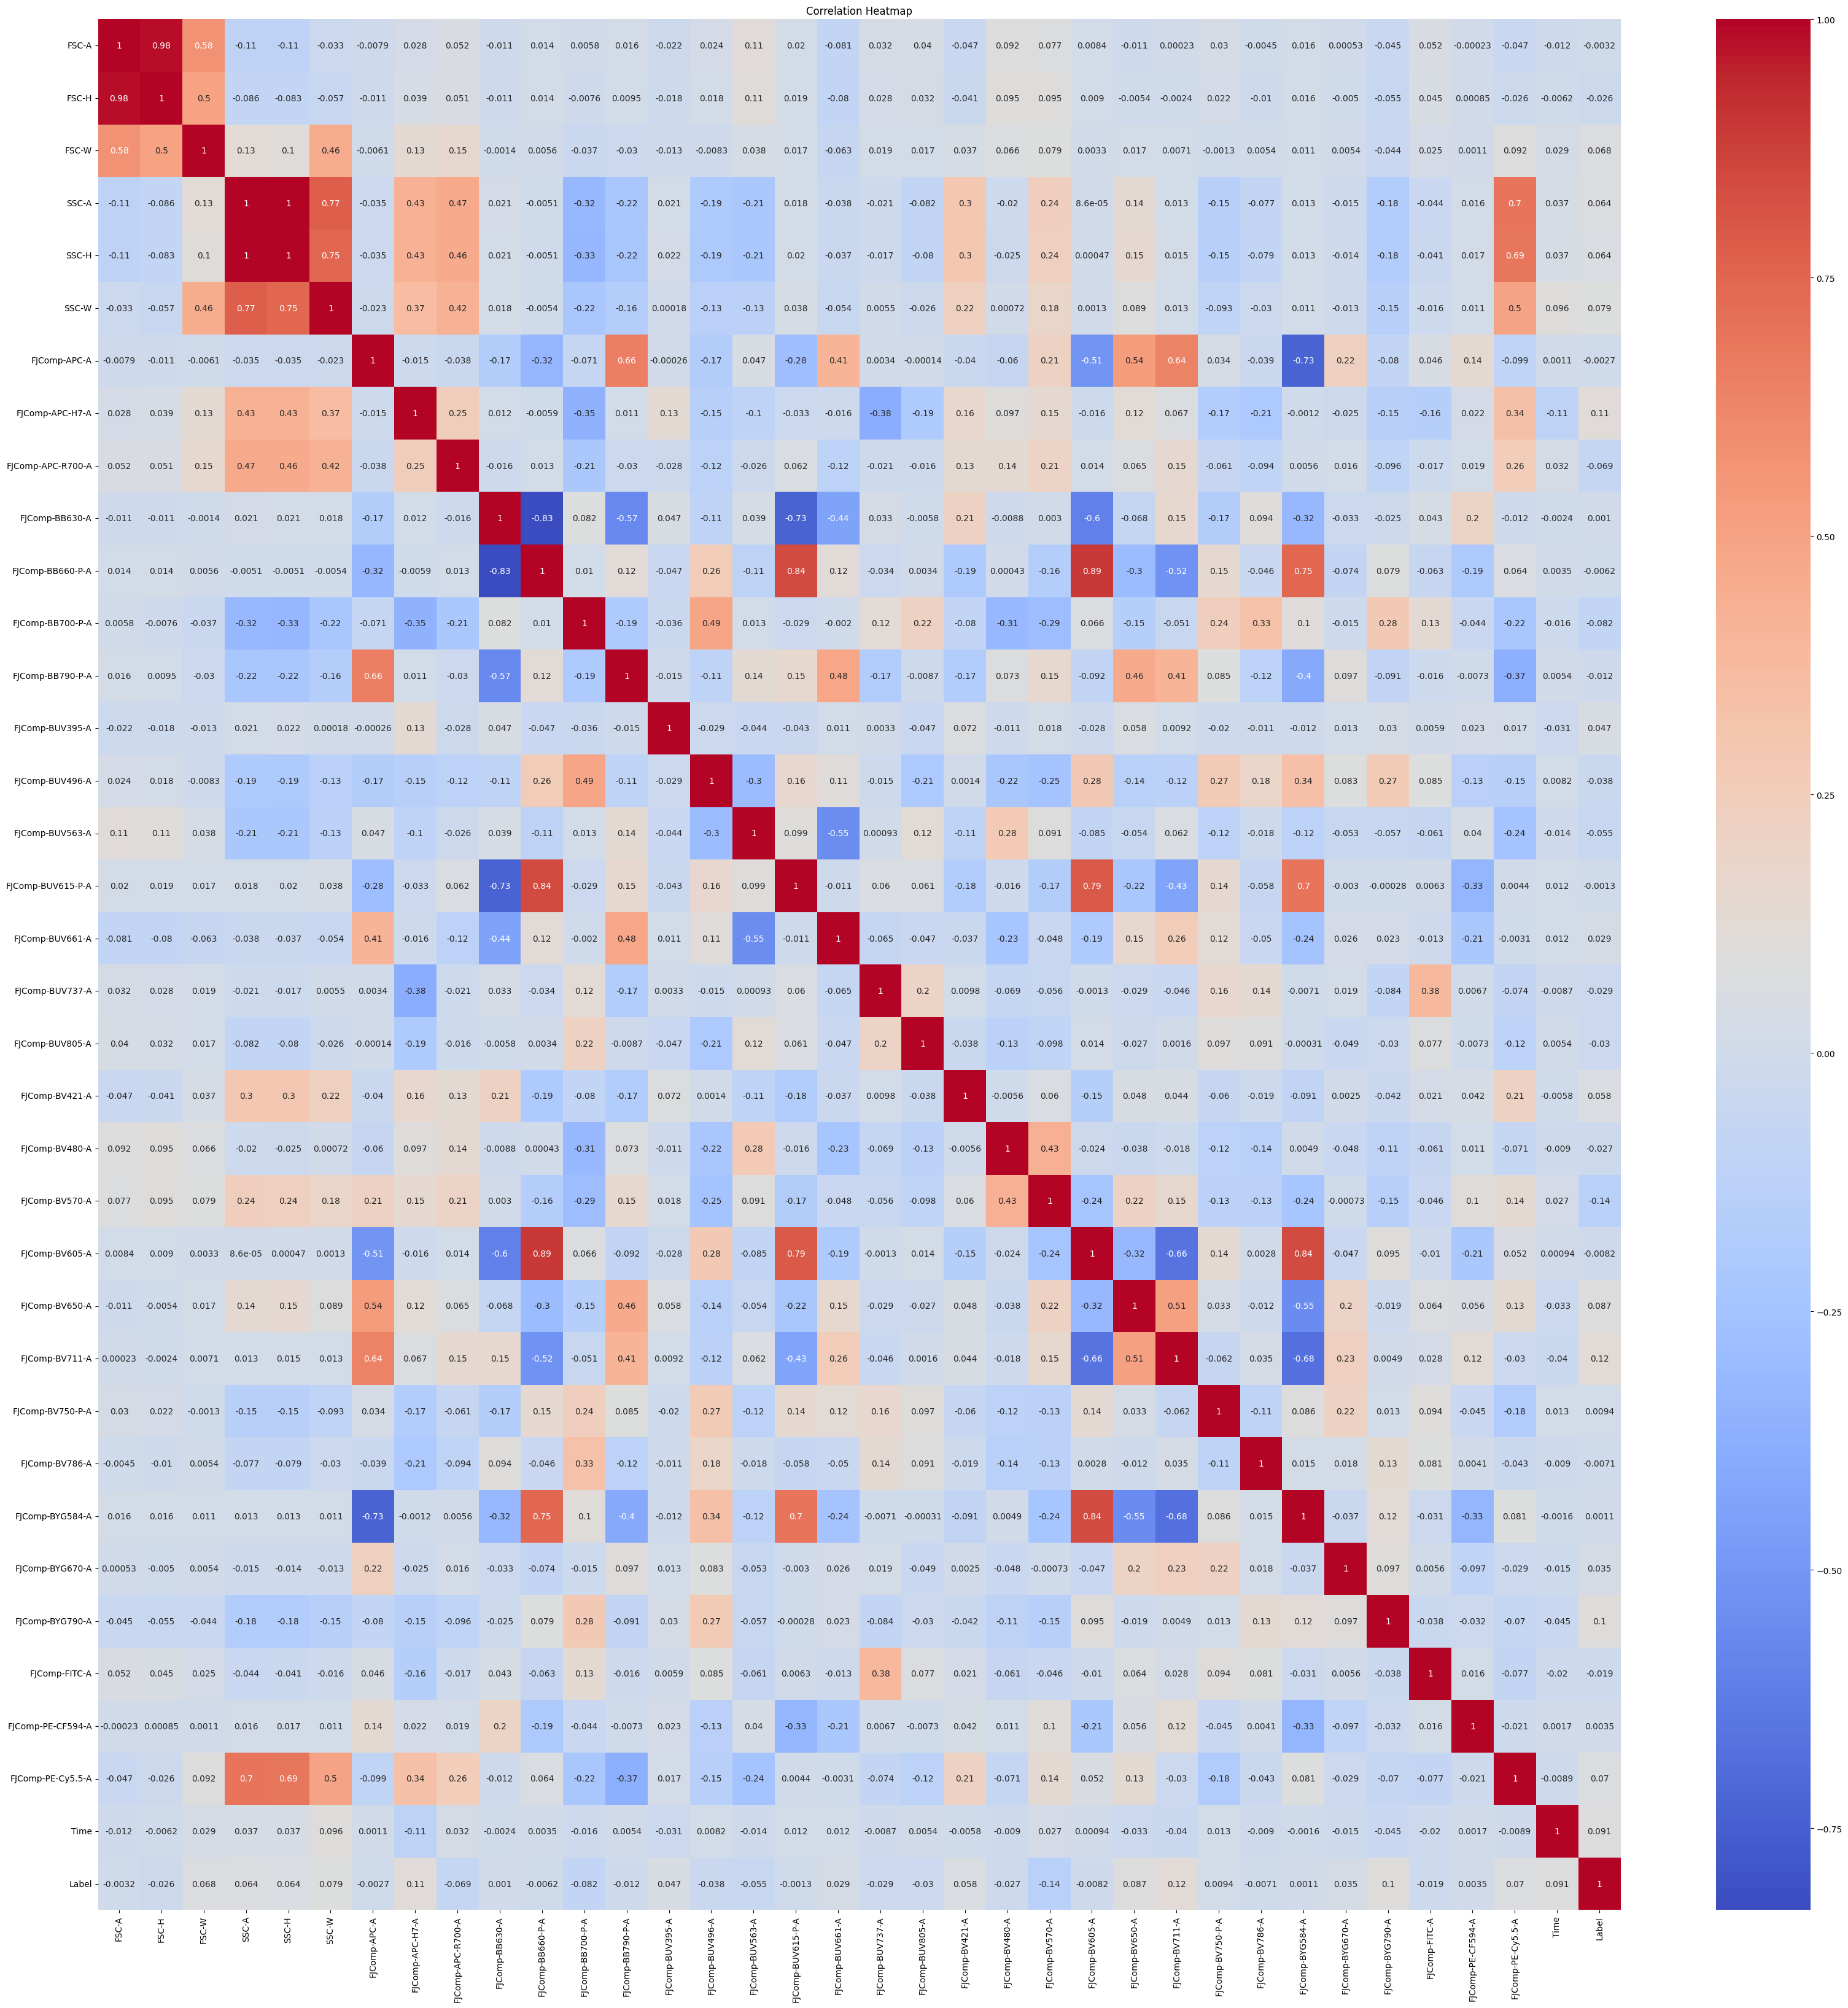

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame (assuming you have already loaded your data)
df =final_df

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
def plot_correlation_heatmap(correlation_matrix):
    plt.figure(figsize=(40, 40))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

# Call the correlation heatmap function
plot_correlation_heatmap(correlation_matrix)


In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your data into a pandas DataFrame (assuming you have already loaded your data)
df =final_df

# Select the column you want to normalize
selected_column = "FJComp-BYG790-A"

# Extract the selected column for normalization
column_data = df[selected_column].values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected column data
normalized_column_data = scaler.fit_transform(column_data)

# Replace the original column with the normalized values
df[selected_column] = normalized_column_data


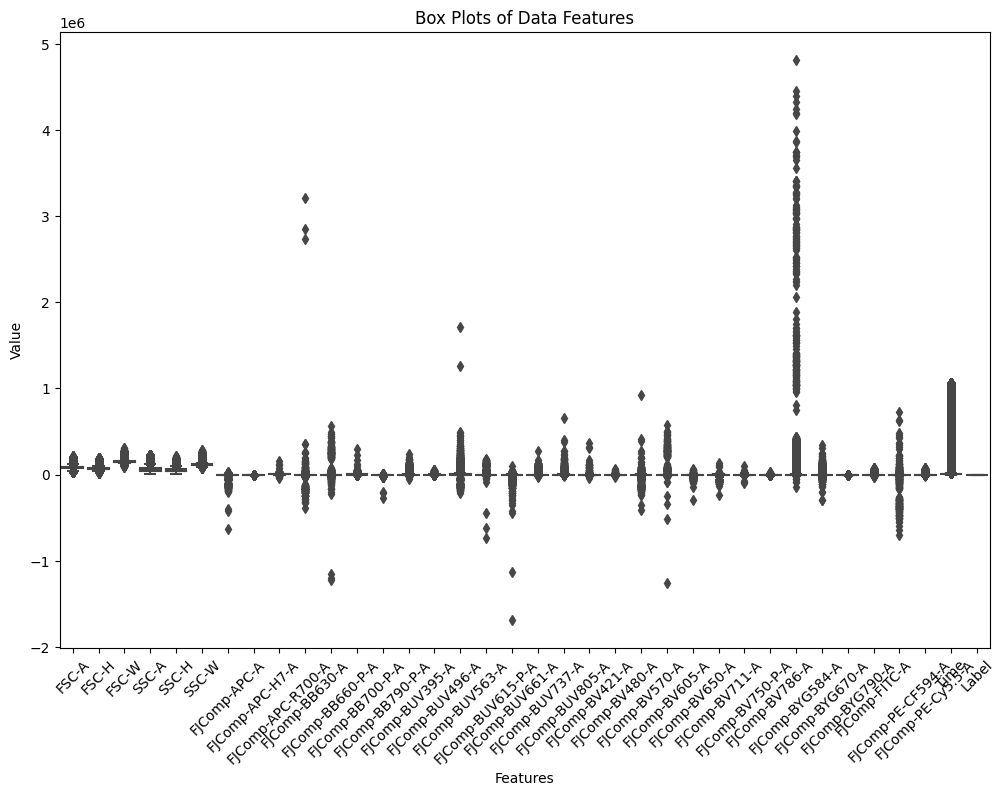

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a pandas DataFrame (assuming you have already loaded your data)
df =final_df

# Plot histograms for each feature
# def plot_histograms(data):
#     plt.figure(figsize=(12, 8))
#     for column in data.columns:
#         plt.hist(data[column], bins=20, alpha=0.5, label=column)
#     plt.xlabel("Value")
#     plt.ylabel("Frequency")
#     plt.title("Histograms of Data Features")
#     plt.legend()
#     plt.show()

# Plot box plots for each feature
def plot_boxplots(data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data)
    plt.xlabel("Features")
    plt.ylabel("Value")
    plt.title("Box Plots of Data Features")
    plt.xticks(rotation=45)
    plt.show()

# Explore data distribution using histograms and box plots
# plot_histograms(df)
plot_boxplots(df)


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load your data into a pandas DataFrame (assuming you have already loaded your data)
df =final_df

# Select the column you want to normalize
selected_column = "FJComp-FITC-A"

# Extract the selected column for normalization
column_data = df[selected_column].values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected column data
normalized_column_data = scaler.fit_transform(column_data)

# Check the range of normalized data
print("Min:", np.min(normalized_column_data))
print("Max:", np.max(normalized_column_data))

# Replace the original column with the normalized values
df[selected_column] = normalized_column_data


Min: 0.0
Max: 1.0


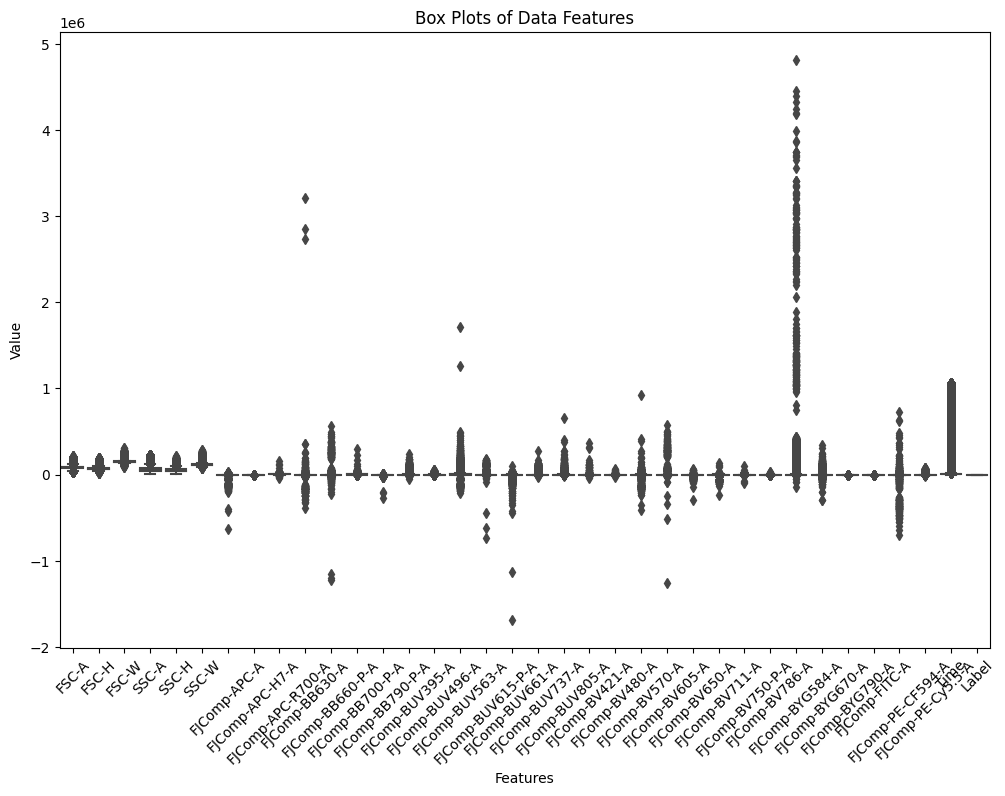

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a pandas DataFrame (assuming you have already loaded your data)
df =final_df

# Plot histograms for each feature
# def plot_histograms(data):
#     plt.figure(figsize=(12, 8))
#     for column in data.columns:
#         plt.hist(data[column], bins=20, alpha=0.5, label=column)
#     plt.xlabel("Value")
#     plt.ylabel("Frequency")
#     plt.title("Histograms of Data Features")
#     plt.legend()
#     plt.show()

# Plot box plots for each feature
def plot_boxplots(data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data)
    plt.xlabel("Features")
    plt.ylabel("Value")
    plt.title("Box Plots of Data Features")
    plt.xticks(rotation=45)
    plt.show()

# Explore data distribution using histograms and box plots
# plot_histograms(df)
plot_boxplots(df)


In [59]:
# import pandas as pd

# # Load your data into a pandas DataFrame (assuming you have already loaded your data)
# df =final_df

# # Calculate the correlation matrix
# correlation_matrix = df.corr()

# # Find highly correlated feature pairs (set a threshold for correlation coefficient)
# threshold = 0.9  # Example threshold value (you can adjust this)
# highly_correlated = set()

# for i in range(len(correlation_matrix.columns)):
#     for j in range(i+1, len(correlation_matrix.columns)):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             colname_i = correlation_matrix.columns[i]
#             colname_j = correlation_matrix.columns[j]
#             highly_correlated.add((colname_i, colname_j))

# # Drop one feature from each highly correlated pair
# features_to_drop = set()

# for pair in highly_correlated:
#     feature_i, feature_j = pair
#     correlation_i = abs(df[feature_i].corr(df["Label"]))  # Calculate correlation with target column
#     correlation_j = abs(df[feature_j].corr(df["Label"]))

#     # Keep the feature with higher correlation with the target column
#     if correlation_i > correlation_j:
#         features_to_drop.add(feature_j)
#     else:
#         features_to_drop.add(feature_i)

# # Drop the selected features
# df_selected = df.drop(columns=features_to_drop)


In [60]:
# print("Features dropped due to high correlation:")
# for feature in features_to_drop:
#     print(feature)


In [61]:
X = final_df.drop(['Label','COVID19','Patient_ID'], axis=1)
y = final_df["Label"]


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [64]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred = clf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7764807865862348
Confusion Matrix:
 [[330202 166141]
 [172673 846800]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.66    496343
           1       0.84      0.83      0.83   1019473

    accuracy                           0.78   1515816
   macro avg       0.75      0.75      0.75   1515816
weighted avg       0.78      0.78      0.78   1515816



In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop(['Label','COVID19','Patient_ID'], axis=1), df_selected["Label"], test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.776118605424405


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and preprocessed your data in the 'final_df' DataFrame

# Split the data into features (X) and target (y)
# Split the data into features (X) and target (y)
X = final_df.drop(['Label', 'COVID19', 'Patient_ID'], axis=1)
y = final_df["Label"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Initialize and train K Nearest Neighbors classifier
# knn_clf = KNeighborsClassifier()
# knn_clf.fit(X_train, y_train)
# knn_pred = knn_clf.predict(X_test)
# knn_accuracy = accuracy_score(y_test, knn_pred)

# Initialize and train Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
logreg_pred = logreg_clf.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Initialize and train Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Initialize and train Multi Layer Perceptron classifier
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
mlp_pred = mlp_clf.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

# Print accuracy scores for each model
# print("K Nearest Neighbors Accuracy:", knn_accuracy)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Multi Layer Perceptron Accuracy:", mlp_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7026077043651736
Decision Tree Classifier Accuracy: 0.7766377977274287
Multi Layer Perceptron Accuracy: 0.6725572233041477
